In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

C:\Users\Jonathan\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Import data
df = pd.read_csv('cleaned_data.csv')

# # Subset the input variables to only the most important
# df = df[['field3', 'flag5', 'field4', 'zipbins', 'fraud']]

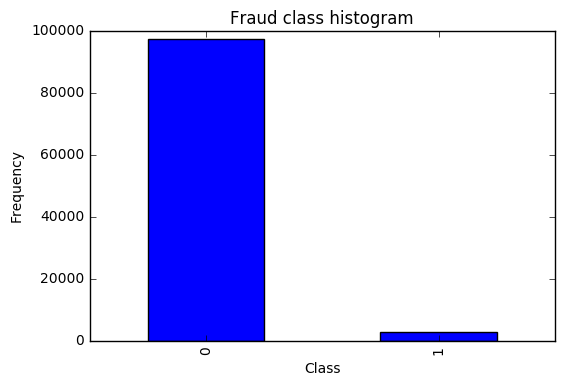

In [3]:
# Check the balance of the data set
count_classes = pd.value_counts(df['fraud'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [4]:
# Split the data frame into input and target data frames
X = df.ix[:, df.columns != 'fraud']
y = df.ix[:, df.columns == 'fraud']

# Use undersampling to create a balanced set
# Number of data points in the minority class
number_records_fraud = len(df[df['fraud'] == 1])
fraud_indices = np.array(df[df['fraud'] == 1].index)

# Picking the indices of the normal classes
normal_indices = df[df['fraud'] == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'fraud']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'fraud']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data['fraud'] == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data['fraud'] == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  5308


In [5]:
# Shuffle and partition our data into 80% train data and 20% test data.
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.2)

In [6]:
# Choosing which model to use for our data
clf = RandomForestClassifier(n_estimators=100)
# clf = LogisticRegression(C = best_c, penalty = 'l1')
# clf = tree.DecisionTreeClassifier()

# Training the data
clf.fit(X_train, y_train)

# Scoring the model
accuracy = clf.score(X_test, y_test)

# Printing the score of the model
print(accuracy)

C:\Users\Jonathan\AppData\Local\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.812617702448


In [7]:
# Predicting the test data
y_pred = np.array(clf.predict(X_test))
y_test = np.array(y_test)
y_test.resize(len(y_pred))

# Displaying a confusion matrix
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(df_confusion)

Predicted    0    1
Actual             
0          464   84
1          115  399


In [8]:
# print(df_confusion[1][1].values)
sensitivity = (df_confusion[1][1] / (df_confusion[1][1] + df_confusion[0][1])) * 100
specificity = (df_confusion[0][0] / (df_confusion[1][0] + df_confusion[0][0])) * 100
accuracy *= 100
print('Sensitivity: %s' % sensitivity)
print('Specificity: %s' % specificity)
print('Accuracy: %s' % accuracy)

Sensitivity: 77.626459144
Specificity: 84.6715328467
Accuracy: 81.2617702448


In [9]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.811489959953


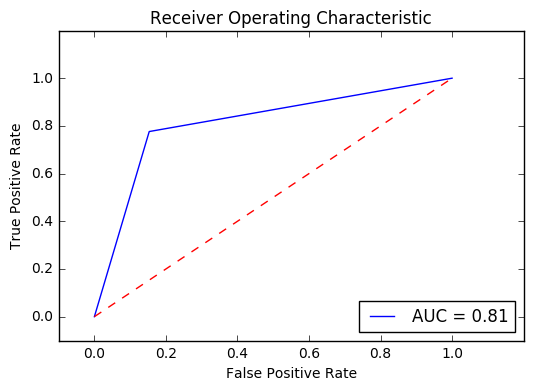

In [10]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()